In [1528]:
#导入相关库
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import warnings
warnings.filterwarnings("ignore")

数据加载和清洗

In [1529]:
jobs = pd.read_csv('job.csv',engine='python')
jobs.info()
#np.isnan(jobs).any()
#jobs.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
职位      496 non-null object
公司      496 non-null object
城市      496 non-null object
工资      496 non-null object
发布日期    496 non-null object
经验要求    496 non-null object
学历      496 non-null object
dtypes: object(7)
memory usage: 27.2+ KB


In [1530]:
jobs.columns

Index(['职位', '公司', '城市', '工资', '发布日期', '经验要求', '学历'], dtype='object')

In [1531]:
jobs.describe()

,职位,公司,城市,工资,发布日期,经验要求,学历
count,496,496,496,496,496,496,496
unique,251,490,129,108,2,5,5
top,Python开发工程师,博彦科技股份有限公司,深圳-南山区,1-1.5万/月,07-19,3-4年经验,本科
freq,155,2,29,85,471,150,333


选取我们需要的特征

In [1532]:
jobs = jobs[['城市','工资','经验要求','学历']]
print(jobs.head(2))


       城市          工资    经验要求  学历
0  北京-朝阳区  0.8-1.3万/月    2年经验  本科
1  深圳-福田区    1-1.5万/月  3-4年经验  本科


In [1533]:
#jobs['学历']

In [1534]:
#type(jobs['经验要求'])

In [1535]:
## 城市字符串处理函数
def get_area(area):
    if '-' in area:
        area = area.split('-')
        return area[0]
    else:
        return area

In [1536]:
jobs['城市'] = jobs['城市'].apply(get_area)

这些注释只是为了分析数据而写的代码，以下相同

In [1537]:
#jobs['城市'].unique

In [1538]:
#jobs.info()
#jobs.describe()

In [1539]:
print(jobs.head(2))

   城市          工资    经验要求  学历
0  北京  0.8-1.3万/月    2年经验  本科
1  深圳    1-1.5万/月  3-4年经验  本科


In [1540]:
#str = "2-年工作经验"
#str = str.split('-')
#str

In [1541]:
## 经验字符串处理函数           
def get_exp(exp):
    ## 1年经验，2年经验，3-9年经验，无工作经验
    #exp=str(exp)
    if '-' in exp:
        exp = exp.split('-')
        return exp[0] 
    elif exp=='无工作经验':
        return 0
    else:
        return exp[0]


In [1542]:
jobs['经验要求'] = jobs['经验要求'].apply(get_exp)

In [1543]:
print(jobs.head(2))

   城市          工资 经验要求  学历
0  北京  0.8-1.3万/月    2  本科
1  深圳    1-1.5万/月    3  本科


In [1544]:
 
## 工资字符串处理函数
def get_wage(wage):
    ## 三种情况举例：1.5-2千/月,0.4-1.2万/月,12-35万/年
    
    if wage.endswith('千/月'):
        wage = wage.replace('千/月','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*1000/2)
        return wage
    elif wage.endswith('万/月'):
        wage = wage.replace('万/月','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*10000/2)
        return wage
    elif wage.endswith('万/年'):
        wage = wage.replace('万/年','')
        wage = wage.split('-')
        wage = '%.2f'%((float(wage[0])+float(wage[1]))*10000/(2*12))
        return wage

In [1545]:

jobs['工资'] = jobs['工资'].apply(get_wage)


In [1546]:
#jobs['工资']

In [1547]:
print(jobs.head(2))

   城市        工资 经验要求  学历
0  北京  10500.00    2  本科
1  深圳  12500.00    3  本科


用图表对数据进行进一步的分析

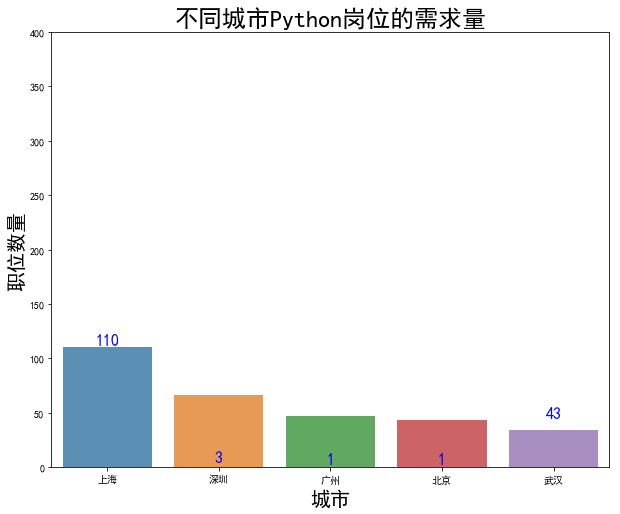

In [1548]:
city_count = jobs.groupby(['城市'])['城市'].count()
#df_train.groupby("hour").sum()['count'].sort_index().plot()

#city_count5 = city_count.sort('city_count.values', ascending=False)
city_count5 = city_count .sort_values(ascending = False).head(5)

ax = plt.figure(figsize=(10, 8)).add_subplot(111)
sns.barplot(city_count5.index, city_count5.values, alpha=0.8)
ax.set_ylim([0, 400])
ax.set_xlabel('城市', fontsize=20)
ax.set_ylabel('职位数量', fontsize=20)
ax.set_title('不同城市Python岗位的需求量', size=24)
for x, y in zip(range(5), city_count.values):
    ax.text(x, y, '%d'%y, ha='center', va='bottom', fontsize=16, color='b')
plt.show()


从上图可以看出，一线城市，Python岗位的需求最多，就业机会大，不过人才比较集中，也意味着竞争压力也较大。

In [1549]:
#city_count5 = city_count.sort_values(ascending = False).head(5)
#city_count5

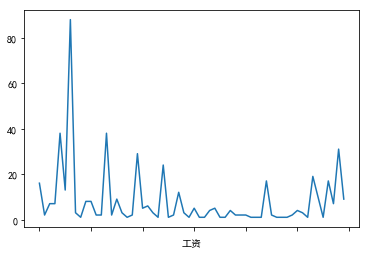

In [1550]:
#工资分布情况
jobs.groupby(['工资'])['工资'].count().plot()


从总体薪酬可以看出，Python的收入还是挺可观的。薪酬主要集中在5k-18k，但也有明显的断层。

In [1551]:
city_count.values

array([110,   3,   1,   1,  43,  23,   2,   1,   1,   4,   6,   2,   8,
         1,   1,   3,  47,  13,   3,  18,   2,   1,   4,  30,   1,  34,
         1,   2,  66,   1,   4,   1,   6,   1,   1,  16,   8,  12,   1,
         8,   5], dtype=int64)

ax2 = plt.figure(figsize=(10, 6)).add_subplot(111)
#sns.distplot(jobs['工资'].astype(float), kde=False, bins=30)
sns.distplot(jobs['工资'], kde=False, bins=30)
ax2.set_title('工资分布', fontsize=22)
ax2.set_xlabel('工资（元/月）', fontsize=18)
ax2.set_xticks(range(0,50000,10000))
plt.show()


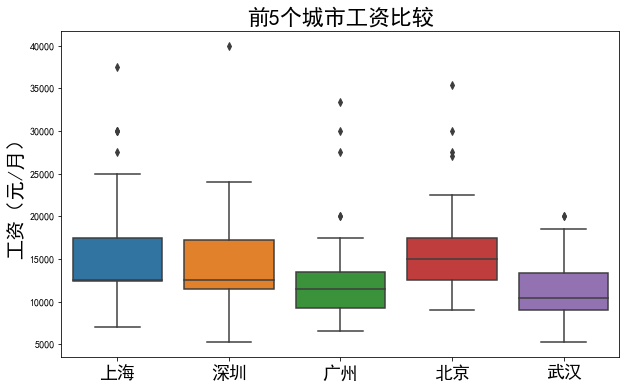

In [1552]:
group_by_city = jobs.groupby(['城市'])['工资']
df_city = []
for group in city_count5.index:
    v = group_by_city.get_group(group).values
    df_city.append(v)
ax3 = plt.figure(figsize=(10, 6)).add_subplot(111)
sns.boxplot(data=df_city)
ax3.set_xticklabels(city_count5.index, fontsize=18)
ax3.set_title('前5个城市工资比较', fontsize=22)
ax3.set_ylabel('工资（元/月）', fontsize=20)
plt.show()


从图上可以看出北京的工资最高，其次是上海，杭州，深圳，广州。

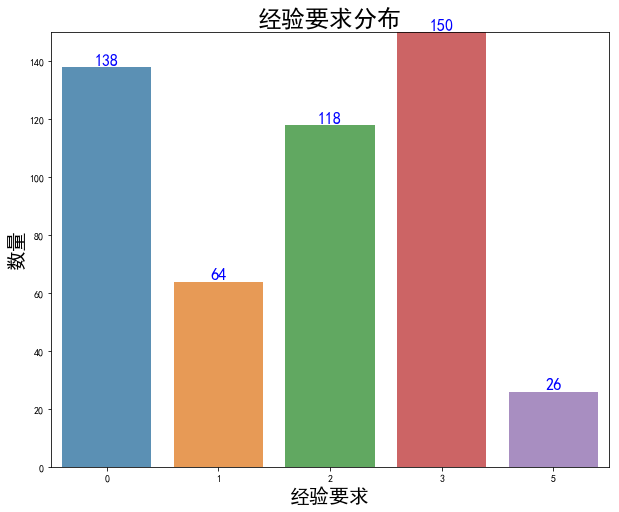

In [1553]:
exp_count = jobs.groupby(['经验要求'])['经验要求'].count()
ax4 = plt.figure(figsize=(10, 8)).add_subplot(111)
sns.barplot(exp_count.index, exp_count.values, alpha=0.8)
ax4.set_ylim([0, 150])
ax4.set_xlabel('经验要求', fontsize=20)
ax4.set_ylabel('数量', fontsize=20)
ax4.set_title('经验要求分布', size=24)
for x, y in zip(range(5), exp_count.values):
    ax4.text(x, y, '%d'%y, ha='center', va='bottom', fontsize=16, color='b')
plt.show()


2-3年经验的需求比较大，主要集中在这两个年限。从这个情况看，虽然该岗位需求大，但是不能盲目转行，毕竟对经验要求比较大。
从长远看，5年以上经验的需求还是比较少的，10年以上近乎无，可以看出5年这个点是比较关键的，职业规划需要在前几年做好，尽快提升自己。

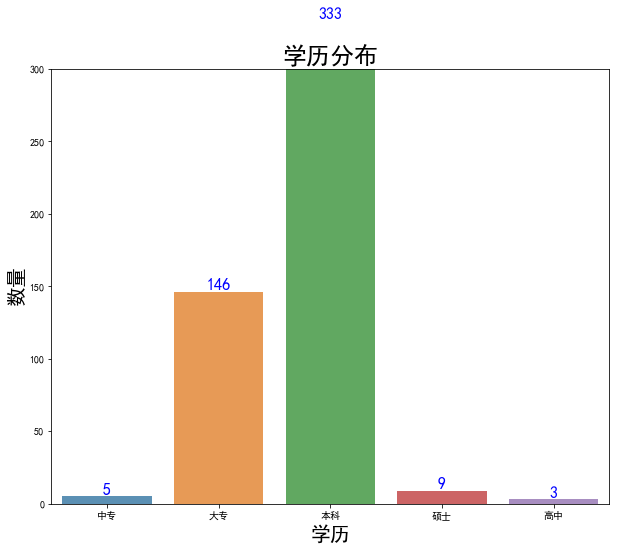

In [1554]:
xueli_count = jobs.groupby(['学历'])['学历'].count()
ax5 = plt.figure(figsize=(10, 8)).add_subplot(111)
sns.barplot(xueli_count.index, xueli_count.values, alpha=0.8)
ax5.set_ylim([0, 300])
ax5.set_xlabel('学历', fontsize=20)
ax5.set_ylabel('数量', fontsize=20)
ax5.set_title('学历分布', size=24)
for x, y in zip(range(5), xueli_count.values):
    ax5.text(x, y, '%d'%y, ha='center', va='bottom', fontsize=16, color='b')
plt.show()


Python对本科生的需求最大，其次是大专，其他学历需求很少，对于博士需求基本没有。

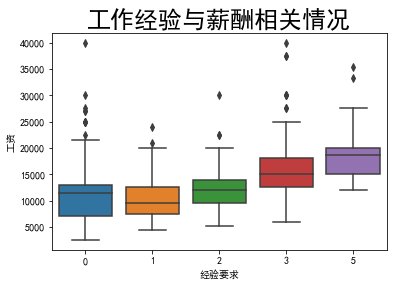

In [1555]:
sns.boxplot(jobs['经验要求'].astype(int),jobs['工资'].astype(float))
plt.xlabel('经验要求')
plt.ylabel('工资')
plt.title('工作经验与薪酬相关情况',size=24)
plt.show()


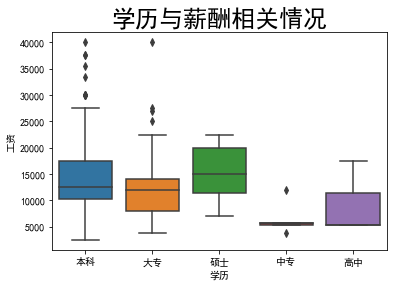

In [1556]:
 sns.boxplot(jobs['学历'],jobs['工资'].astype(float))
 plt.xlabel('学历')
 plt.ylabel('工资')
 plt.title('学历与薪酬相关情况',size=24)
 plt.show()


从以上两图可以看出随着工作经验的增加，相应的工资也会随着增加。随着学历的上升，相应的工资也会随着增加。这些均符合我们的常识判断。

In [1557]:
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.linear_model import LinearRegression as LR

总结
1、Python就业机会主要集中在一线城市，如上海、深圳、北京等城市；
2、Python岗位的薪资主要集中在5k-18k，中间有几个小分水岭，薪资有较大的发展空间，且一线城市中北京的工资最高，其次是上海，杭州，深圳，广州。
3、Python岗位的经验要求集中在2-3年，该岗位对经验方面比较看重，且工作经验和工资呈正相关。值得注意的是从长远看，5年以上经验的需求还是比较少的。
4、Python在学历方面对本科生的需求最大，其次是大专，其他学历需求很少，对于博士需求基本没有，在此基础上学历和工资呈正相关。


#将各字符分类变量重编码为数值分类变量

In [1558]:
le = LE()   
                                         
jobs['城市'] = le.fit_transform(jobs['城市'].values)          #城市重编码  


In [1559]:
#jobs['城市'].unique

In [1560]:
#学历重编码 
jobs['学历']=jobs['学历'].replace('中专',0)                  
jobs['学历']=jobs['学历'].replace('高中',1)
jobs['学历']=jobs['学历'].replace('大专',2)
jobs['学历']=jobs['学历'].replace('本科',3)
jobs['学历']=jobs['学历'].replace('硕士',4)


In [1561]:
#jobs['学历']

In [1562]:
#jobs['经验要求']

In [1563]:
jobs.columns

Index(['城市', '工资', '经验要求', '学历'], dtype='object')

In [1564]:
#jobs['城市']
#jobs['经验要求']

In [1565]:
jobs[jobs['工资'].isnull()]

,城市,工资,经验要求,学历
84,0,None,0,3
294,0,None,3,3


In [1566]:
##??jobs.dropna

In [1567]:
jobs.dropna(inplace=True)

In [1568]:
## 特征选择
X = jobs[['城市','经验要求','学历']]
X = X.as_matrix().astype(np.float)
X.shape

(494, 3)

In [1569]:
## 结果集
y = jobs['工资']
y = y.as_matrix().astype(np.float)
#y

In [1570]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 495
Data columns (total 4 columns):
城市      494 non-null int64
工资      494 non-null object
经验要求    494 non-null object
学历      494 non-null int64
dtypes: int64(2), object(2)
memory usage: 19.3+ KB


In [1571]:
XX = X.astype(np.int32)

In [1572]:
sum(XX == 0)

array([108, 137,   5])

In [1573]:
sum(np.isnan(X))

array([0, 0, 0])

In [1574]:
np.max(X, axis=0)

array([40.,  5.,  4.])

In [1575]:
sum(np.isnan(y))

0

In [1576]:
#np.unique(y)

In [1577]:
from sklearn import linear_model
#clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
#clf.fit(X, y)
    
#clf

In [1578]:
## 模型学习
model = LR()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1579]:
from sklearn.model_selection import train_test_split # 分割数据模块
from sklearn import preprocessing#数据预处理

In [1580]:
#X = preprocessing.scale(X)

X, y = make_classification(
    n_redundant=0, n_informative=2, 
    random_state=22, n_clusters_per_class=1, 
    scale=100)

In [1581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [1582]:
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
svm = SVC()
svm.fit(X_train.astype(int),y_train.astype(int))
svm.score(X_test,y_test)

0.16129032258064516

In [1583]:

model = LR()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.15379421274207894


In [1584]:
#from sklearn.metrics import accuracy_score
#y_pred = model.predict(X_test)
#accuracy_score(y_test, y_pred)

In [1585]:
from sklearn.neighbors import KNeighborsClassifier # K最近邻(kNN，k-NearestNeighbor)分类算法

In [1586]:
knn = KNeighborsClassifier()
knn.fit(X_train.astype(int), y_train.astype(int))
print(knn.score(X_test, y_test))

0.14516129032258066


In [1587]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.14516129032258066

In [1588]:
from sklearn.model_selection import cross_val_score 

In [1589]:
from sklearn.model_selection import cross_val_score # K折交叉验证模块

#使用K折交叉验证模块
#对数据集进行指定次数的交叉验证并为每次验证效果评测
# cv  默认使用KFold 或StratifiedKFold 进行数据集打乱
scores = cross_val_score(knn,X.astype(int),y.astype(int),scoring='accuracy',cv=10)

#将5次的预测准确率打印出
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]

#将5次的预测准确平均率打印出
print(scores.mean())
# 0.973333333333

[0.06896552 0.11594203 0.0877193  0.19607843 0.17021277 0.25
 0.14285714 0.10810811 0.125      0.17857143]
0.1443454721339176


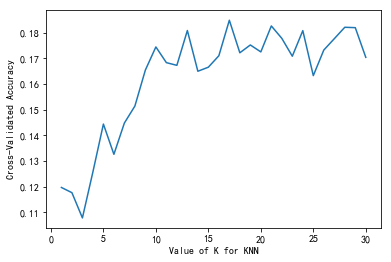

In [1590]:
import matplotlib.pyplot as plt #可视化模块
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # 分割数据模块
from sklearn.neighbors import KNeighborsClassifier # K最近邻(kNN，k-NearestNeighbor)分类算法
%matplotlib inline


#建立KNN测试参数
k_range = range(1, 31)

k_scores = []  #用来放每个模型的结果值

#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    #pass
    # #knn模型，这里一个超参数可以做预测，当多个超参数时需要使用另一种方法GridSearchCV
    knn=KNeighborsClassifier(n_neighbors=k)  
    # 这里的cross_val_score将交叉验证的整个过程连接起来，不用再进行手动的分割数据
    # cv参数用于规定将原始数据分成多少份
    scores = cross_val_score(knn,X.astype(int),y.astype(int),cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

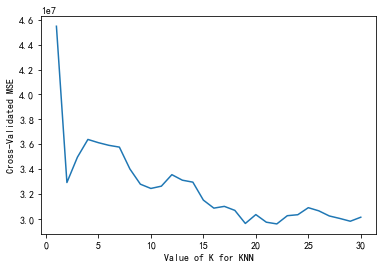

In [1591]:
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error')
    loss = -cross_val_score(knn, X.astype(int), y.astype(int), cv=10, scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

In [1605]:
def model_compare(classifiers, cv=10, scr='accuracy'):
    all_scores = []
    for name, clf in classifiers.items():
        scores = cross_val_score(clf, X.astype(int), y.astype(int), cv=cv, scoring=scr)
        print(name,'\t--> ',scores.mean())
        all_scores.append(scores.mean())
    return all_scores

In [1606]:
classifiers = {
'KN': KNeighborsClassifier(3),
'SVM':SVC()
}

In [1607]:
ascores = model_compare(classifiers)

KN 	-->  0.10775772561903388
SVM 	-->  0.1918195660320806


In [1604]:

##构建预测函数
def wage_pred(area,exp,xueli):
    area_index = list(le.classes_).index(area)
    xueli_index = list(('中专','高中','大专','本科','硕士')).index(xueli)
    wage_pred = model.predict([[area_index,exp,xueli_index]])
    print('%.2f'%wage_pred)
    
## 测试代码
if __name__ == '__main__':
	wage_pred('北京',2,'本科')
    #wage_pred('长沙',1,'本科')

15126.96
